# Information Visualisation Project

In [1]:
# Imports 
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Import the Dataset
data = pd.read_csv('spotify_songs.csv', sep = ',')
# Creating a second dataframe for popular tracks only
data_popular = data[data['track_popularity'] > 90]

# Part 1: All popular songs are the same

In part 1 we shall be performing the data story from the following perspective:

"Popular music sounds the same. Releasing music has become a cash grab, so everything follows a recipe for quick success. Songs nowadays are all loud, energetic and repetitive."

Our analysis begins by exploring the genre distribution in the entire dataset using a pie chart, to determine broad similarities and differences. Additionally, we utilize a second pie chart to examine the genre distribution specifically within the most popular songs (track_popularity rating of 90 or higher).

In [10]:
# Pie chart for the complete dataset
fig = px.pie(data,
             values = 'track_popularity',
             names='playlist_genre',
             title='Distribution of genres for the entire dataset',
             hole = 0.8,
             color_discrete_sequence = px.colors.qualitative.T10,)

fig.update_layout(showlegend=False,
                  height = 400,
                 )
fig.update_traces(textposition = 'outside',
                  textinfo='label+percent')
fig.show()



<p>This pie chart illustrates the genre distribution in the entire dataset. Pop dominates with 24.5%, followed closely by rock, rap, and R&B, each hovering around 18-20%. Latin accounts for 12.5%, while EDM represents 8.75% of the songs. This  showcases the diversity of genres in the entire dataset. But when specifically looking at popular songs, there is a different distribution visible.  </p>

In [4]:
# Pie chart for the top 10% most popular songs in the dataset
fig = px.pie(data_popular,
             values = 'track_popularity',
             names='playlist_genre',
             title='Distribution of genres for popular songs',
             hole = 0.8,
             color_discrete_sequence = px.colors.qualitative.T10,)

fig.update_layout(showlegend=False,
                  height = 400)
fig.update_traces(textposition = 'outside',
                  textinfo='label+percent')
fig.show()

<p> The second pie chart reveals the genre distribution among popular songs.  The dominance of Pop with 72.9% suggests a prevalence of mainstream, commercially-driven music. The comparatively lower percentages for R&B, Latin, and Rap indicate a lack of diversity and further support the notion that popular songs today tend to conform to a formulaic approach.  </p>

|Genre| In complete dataset | In popular dataset | Difference |
| :---: | :---: | :---: | :---: |
| pop | 24.5% | 72.9% | + 48.4% |
| rap | 18.7% | 18% | - 0.7% |
| latin | 12.5% | 6.11% | - 6.39% |
| r&b | 16.6% | 2.96% | - 5.1% |
| rock | 18.9% | 0% | - 18.9% |
| edm | 8.75% | 0% | - 8.75% |


<p> The different proportions of the genres are visible in the table above. table. We see every genre, except pop, deminish in size when compared to the genres most popular songs. The genres that are hit the hardest by this are rock (18.9% decrease) and edm (8.75% decrease). 

Pop is the biggest winner as it gains a whopping 48.4% <p>

In [5]:
# Scatter plot for the acousticness

# Grab the 100 most popular songs
fig = px.scatter(data.sort_values(by='track_popularity', ascending = False).head(100),
    x = 'instrumentalness',
    y = 'acousticness',)

fig.update_layout(title = 'Analysis of acousticness and instrumentalness for the top 100 most popular songs')

fig.show()

In the 3d scatter plot we can see a slight  trend towards lower values for acousticness. We also see a very big trend for popular songs for low instrumentalness with a few outliers.

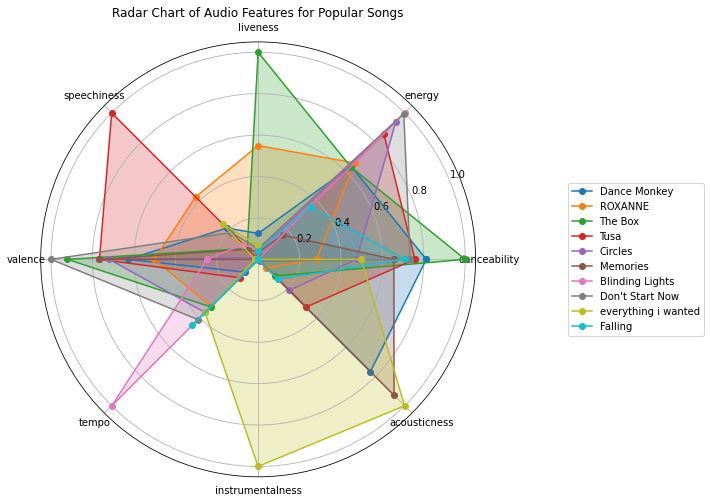

In [6]:
# Radar Chart

# Select the audio features for the radar chart 

audio_features = ['danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo', 'instrumentalness', 'acousticness']

# Select a subset of pop songs
subset_songs = data_popular.sort_values(by='track_popularity', ascending=False).head(10)  # Change the number of songs as desired

# Prepare data for the radar chart
labels = subset_songs['track_name']
values = subset_songs[audio_features].values

# Normalize the values for each feature
normalized_values = (values - np.min(values, axis=0)) / (np.max(values, axis=0) - np.min(values, axis=0))

# Create the radar chart
plt.figure(figsize=(8, 8))
angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False).tolist()
angles += angles[:1]
for i, (name, value) in enumerate(zip(labels, normalized_values)):
    ax = plt.subplot(111, polar=True)
    value = np.append(value, value[0])  # Add the first value to the end to close the shape
    ax.plot(angles, value, marker='o', label=name)
    ax.fill(angles, value, alpha=0.25)
plt.xticks(angles[:-1], audio_features)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])

# Move the legend to the side
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.title("Radar Chart of Audio Features for Popular Songs")
plt.show()


## Part 2:

In part 2 we shall be conveying the data story from the following perspective:

All popular songs do not sound the same, the rise of the internet has given birth so such a big diversity of music. 

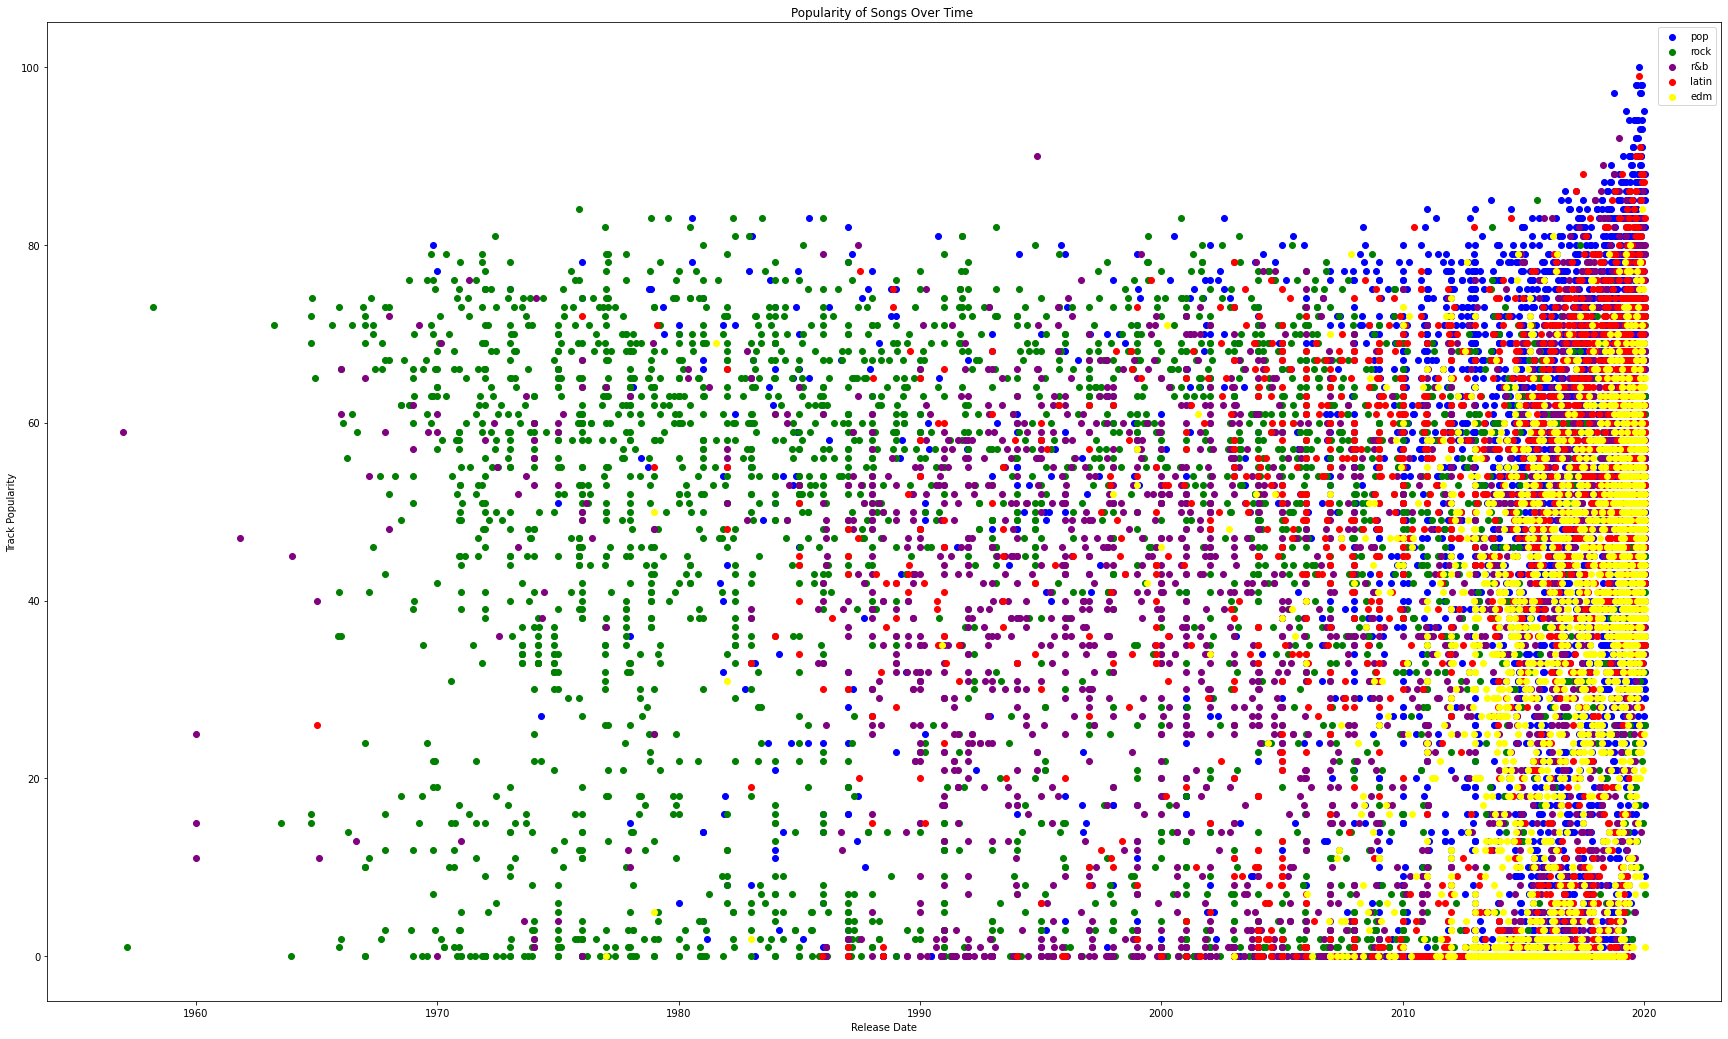

In [7]:
# Filter relevant columns for the scatter plot
scatter_data = data[['track_album_release_date', 'track_popularity', 'playlist_genre']]

# Create a copy of the filtered DataFrame
scatter_data = scatter_data.copy()

# Convert the release date column to datetime
scatter_data['track_album_release_date'] = pd.to_datetime(scatter_data['track_album_release_date'])

# Create a colormap for different genres
colormap = {
    'pop': 'blue',
    'rock': 'green',
    'r&b': 'purple',
    'latin': 'red',
    'edm': 'yellow'
}

# Create the scatter plot
plt.figure(figsize=(30, 18))
for genre, color in colormap.items():
    genre_data = scatter_data[scatter_data['playlist_genre'] == genre]
    plt.scatter(genre_data['track_album_release_date'], genre_data['track_popularity'], color=color, label=genre)

plt.xlabel('Release Date')
plt.ylabel('Track Popularity')
plt.title('Popularity of Songs Over Time ')
plt.legend()
plt.show()


In [8]:
# Parallel Catagories Graph 

# Take top 50 most popular songs
data_top50 = data.sort_values(by = 'track_popularity', ascending = False).head(50)

# Take top 50 least popular songs
data_bot50 = data.sort_values(by = 'track_popularity', ascending = False).tail(50)

# Concatenate into single DataFrame
data_top_bot = pd.concat([data_top50, data_bot50])

# Use qcut to categorise the top 50 and bot 50
cut_bins, cut_labels = pd.qcut(data_top_bot['track_popularity'], q = 2, labels=['Top 50', 'Bot 50'], retbins = True)

# Note: tempo is rounded to -1 for readability sake
fig = go.Figure(go.Parcats(
    dimensions = [{'label': 'loudness', 'values': data_top_bot['loudness'].round(), 'categoryorder': 'category ascending'},
                  {'label': 'speechiness', 'values': data_top_bot['speechiness'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'acousticness', 'values': data_top_bot['acousticness'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'instrumentalness', 'values': data_top_bot['instrumentalness'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'liveness', 'values': data_top_bot['liveness'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'valence', 'values': data_top_bot['valence'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'tempo', 'values': data_top_bot['tempo'].round(-1), 'categoryorder': 'category ascending'},
                 {'label': 'Popularity', 'values': cut_bins, 'categoryorder': 'category descending'}],
    line = {'color': cut_bins.astype('category').cat.codes, 'colorscale': [[0, 'salmon'], [1, 'lightblue']]},


)
)

fig.update_layout(title = 'Characteristics of songs based on popularity',
                 height = 600)
fig.show()

In this parallel categories diagram we can see that the most popular songs often have a low acousticness. However besides the acousticness there is not a clear connection between a variable and the popularity of songs. This means that that popular songs do not have a certain recipe for success and are diverse.

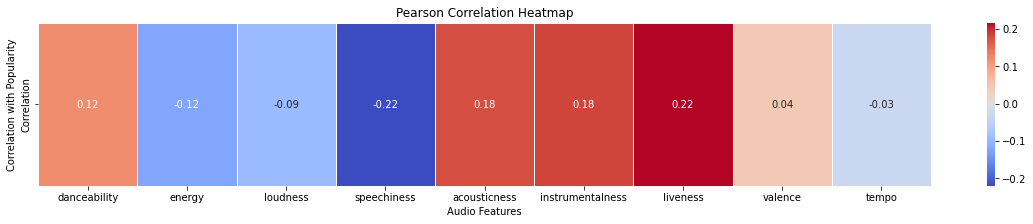

In [9]:
# Select the relevant variables and track popularity
variables = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
popularity = data_popular['track_popularity']

# Calculate Pearson correlation for each variable
correlations = {}
for var in variables:
    var_values = data_popular[var]
    correlation, _ = pearsonr(var_values, popularity)
    correlations[var] = correlation

# Convert the correlations dictionary to a DataFrame
correlation_df = pd.DataFrame(correlations, index=['Correlation'])

# Create a heatmap
plt.figure(figsize=(20, 3))
sns.heatmap(correlation_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Add labels and title
plt.xlabel('Audio Features')
plt.ylabel('Correlation with Popularity')
plt.title('Pearson Correlation Heatmap')

# Show the plot
plt.show()